In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
txt_file = open('../tempest.txt', "r")
text = txt_file.read()
text = [c.lower() for c in text]
N = len(text)

print(N)

106129


In [15]:
characters, occurrences = np.unique(text, return_counts=True)
n = len(characters)
print(n)
probs = occurrences/N

39


In [20]:
def entropy(p):
    idx = np.where(p>0)
    h=-np.sum(np.multiply(p[idx],np.log2(p[idx])))
    return h

def entropy_emp(p,n):
    idx = np.where(p>0)
    h=-np.sum(np.multiply(p[idx],np.log2(p[idx])))
    eh=np.sqrt(np.sum(np.multiply(np.square(np.log2(np.e*p)), np.multiply(p,1-p))/n)) 
    return h,eh
    
    
def KLdivergence(p,q):
    idx = np.where(p>0)
    return np.sum(np.nan_to_num(np.multiply(p[idx],np.log2(p[idx]))))-\
            np.sum(np.nan_to_num(np.multiply(p[idx],np.log2(q[idx]))))


def mutual_information(pxy):
    px=np.sum(pxy,axis=0)
    py=np.sum(pxy,axis=1)
    hx=entropy(px)
    hy=entropy(py)
    hxy=entropy(pxy.reshape(-1))
    MI=hx+hy-hxy
    hxcy=hx-MI
    hycx=hy-MI
    return MI,hx,hy



In [21]:
Hall, EHall = entropy_emp(probs,N)
print(Hall,EHall)

4.229589052568906 0.00952034755131061


In [22]:
L=100
auto_mi = np.zeros(L)


for l in range(1,L+1):
    text1=text[:-l]
    text2=text[l:]
    text3=[text1[i]+text2[i] for i in range(N-l)]
    
    character_pairs, occurrences_pairs_nonzero = np.unique(text3, return_counts=True)
    
    occurrences_pairs=np.zeros((n,n))
    
    for i in range(n):
        ci=characters[i]
        for j in range(n):
            cj=characters[j]
            c=ci+cj
            idx = np.where(character_pairs==c)[0]
            if len(idx)>0:
                occurrences_pairs[i,j]=np.squeeze(occurrences_pairs_nonzero[idx])

    occurrences_pairs=occurrences_pairs/(N-l)
  
    auto_mi[l-1],hx,hy = mutual_information(occurrences_pairs)
    


0.8218745848897342
0.3370541214802376
0.18309971372248057


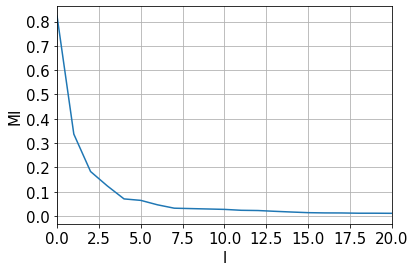

In [28]:
plt.plot(auto_mi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("l",size=15)
plt.ylabel("MI",size=15)
plt.xlim(0,20)
plt.grid()

print(auto_mi[0])
print(auto_mi[1])
print(auto_mi[2])

In [34]:
text_subsampled = [text[i] for i in range(1,N,10)]

In [47]:
characters_sub, occurrences_sub = np.unique(text_subsampled, return_counts=True)
Nsub = len(text_subsampled)
probs = occurrences_sub/Nsub


Hsub, EHsub = entropy_emp(probs,Nsub)
print(Hall,Hsub,EHall,EHsub)

4.229589052568906 4.22939412884961 0.00952034755131061 0.030112454202498615
